<a href="https://colab.research.google.com/github/Marcotmr/Sustainability-Report-Score/blob/main/Indicator_12_6_1_ML_NLP_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
path_reports = "/content/drive/MyDrive/sustainability"

In [4]:
!pip install pikepdf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install PyPDF2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.6 MB/s eta 0:00:00


In [6]:
!pip install pdfplumber

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 73.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.6/143.6 kB 12.6 MB/s eta 0:00:00


In [7]:
#import libraries
import os
import pikepdf
import pandas as pd
import re
from PyPDF2 import PdfFileReader
from pikepdf import Pdf
import pdfplumber

In [8]:
#define keywords and weights
keywords_weights = {
    "governance": {
        "chief": 6.25,
        "contact": 0.32894737,
        "officer": 6.25,
        "quality": 0.32894737,
        "manager": 0.32894737,
        "account": 0.32894737,
        "administrator": 0.32894737,
        "investment": 0.32894737,
        "legal": 0.32894737,
        "information": 0.32894737,
        "headquarters": 0.32894737,
        "resources": 0.32894737,
        "point": 0.32894737,
        "leader": 0.32894737,
        "marketing": 0.32894737,
        "technology": 0.32894737,
        "risk": 0.32894737,
        "executive": 0.32894737,
        "compliance": 0.32894737,
        "audit": 0.32894737,
        "business": 6.25,
        "communications": 0.32894737

    },
      "Social": {
          "diversity": 5,
          "inclusion": 5,
          "equality": 5,
          "culture": 0.5,
          "empathy": 0.5,
          "responsibility": 0.5,
          "ally": 0.5,
          "humanity": 0.5,
          "community": 5,
          "people": 0.5,
          "partnership": 0.5,
          "peace": 0.5,
          "commitments": 0.5,
          "volunteer": 0.5
      },
      "Financial": {
          "profit": 6.25,
          "revenue": 6.25,
          "equity": 6.25,
          "loans": 0.390625,
          "investment": 0.390625,
          "ROI": 0.390625,
          "funds": 0.390625,
          "return": 0.390625,
          "insurance": 0.390625,
          "stock": 0.390625,
          "shares": 0.390625,
          "buy": 0.390625,
          "sell": 0.390625,
          "purchase": 0.390625,
          "budget": 0.390625,
          "treasury": 0.390625,
          "tax": 0.390625,
          "credit": 0.390625,
          "interest": 0.390625
      },
      "Climate": {
          "emissions": 4.16666667,
          "sustainability": 4.16666667,
          "pollution": 4.16666667,
          "organic": 0.52083333,
          "recycle": 4.16666667,
          "energy": 0.52083333,
          "waste": 0.52083333,
          "resources": 0.52083333,
          "impact": 4.16666667,
          "gas": 0.52083333,
          "eco": 0.52083333,
          "reduce": 0.52083333,
          "planet": 0.52083333,
      }
}

In [9]:
results_df = pd.DataFrame(columns=["Company", "Governance", "Financial", "Social", "Climate", "Score"])

In [10]:
for filename in os.listdir(path_reports):
  if filename.endswith(".pdf"):
    match = re.search(r"(.*?)\s*report\.pdf", filename, re.IGNORECASE)
    if match:
      company_name = match.group(1)
      governance_score = 0
      social_score = 0
      financial_score = 0
      climate_score = 0
      with pdfplumber.open(os.path.join(path_reports, filename)) as pdf:
        for page in pdf.pages:
          text = page.extract_text().strip()
          for section, keywords in keywords_weights.items():
            section_score = 0
            for keyword, weight in keywords.items():
              if re.search(r"\b{}\b".format(keyword), text, re.IGNORECASE):
                section_score += weight
            if section == "governance":
              governance_score = section_score
            elif section == "Social":
              social_score = section_score
            elif section == "Financial":
              financial_score = section_score
            elif section == "Climate":
              climate_score = section_score  
      Score = governance_score + social_score + financial_score + climate_score
      results_df = results_df.append({
          "Company": company_name,
          "Governance": governance_score,
          "Social": social_score,
          "Financial": financial_score,
          "Climate": climate_score,
          "Score": Score
      }, ignore_index=True)

<ipython-input-10-65d91df68966>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-10-65d91df68966>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-10-65d91df68966>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-10-65d91df68966>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-10-65d91df68966>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = 

In [11]:
print(results_df)

           Company Governance Financial Social   Climate     Score
0         ABN amro          0         0      0         0         0
1         agrofair          0         0      0  4.166667  4.166667
2    ASR Nederland          0         0      0         0         0
3       Burg Group   0.657895         0    0.5  5.208333  6.366228
4           CTOUCH          0         0      0  4.166667  4.166667
..             ...        ...       ...    ...       ...       ...
226       wesizewe          0         0      0         0         0
227           WBHO          0         0      0         0         0
228          wipro          0         0      0         0         0
229       yes bank          0         0      0         0         0
230       yokogawa   0.328947  0.390625      0         0  0.719572

[231 rows x 6 columns]


In [12]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [13]:
print(results_df)

                                            Company Governance  Financial  \
0                                          ABN amro          0          0   
1                                          agrofair          0          0   
2                                     ASR Nederland          0          0   
3                                        Burg Group   0.657895          0   
4                                            CTOUCH          0          0   
5                                          dataflex          0          0   
6                                          DS Smith          0          0   
7                                            essity   0.986842          0   
8                                 Friesland Campina          0          0   
9                                          fujifilm   0.328947          0   
10                                         Heineken          0          0   
11                                              KPN          0          0   

In [48]:
results_df.sort_values(by=['Score'],inplace=False,ascending=False)

,Company,Governance,Financial,Social,Climate,Score
47,alexander forbes,15.460526,8.203125,10.5,8.854167,43.017818
201,taisei group,21.381579,9.375,0.5,10.9375,42.194079
20,Volksbank,7.236842,12.890625,10,8.333333,38.4608
108,harmony,20.723684,1.5625,5,9.375,36.661184
163,pan african,20.065789,8.59375,5,0.520833,34.180373
13,P&G,0.657895,0,21.0,8.333333,29.991228
126,kubota,7.894737,8.203125,5,8.854167,29.952029
46,ajinomoto,8.552632,14.453125,0.5,5.729167,29.234923
142,MOL,7.565789,1.171875,0,18.229167,26.966831
44,ahold delhaize,7.894737,8.59375,0,8.854167,25.342654


In [49]:
real_df = results_df[results_df['Score'] != 0]

In [50]:
print(real_df)

                                            Company Governance  Financial  \
1                                          agrofair          0          0   
3                                        Burg Group   0.657895          0   
4                                            CTOUCH          0          0   
6                                          DS Smith          0          0   
7                                            essity   0.986842          0   
9                                          fujifilm   0.328947          0   
13                                              P&G   0.657895          0   
17                              van lanschot kempen   0.328947          0   
20                                        Volksbank   7.236842  12.890625   
23                            minerals technologies   0.657895   0.390625   
28                                        accenture          0   0.390625   
30                                              ayo   0.328947          0   

In [51]:
real_df.sort_values(by=['Score'],inplace=False,ascending=False)

,Company,Governance,Financial,Social,Climate,Score
47,alexander forbes,15.460526,8.203125,10.5,8.854167,43.017818
201,taisei group,21.381579,9.375,0.5,10.9375,42.194079
20,Volksbank,7.236842,12.890625,10,8.333333,38.4608
108,harmony,20.723684,1.5625,5,9.375,36.661184
163,pan african,20.065789,8.59375,5,0.520833,34.180373
13,P&G,0.657895,0,21.0,8.333333,29.991228
126,kubota,7.894737,8.203125,5,8.854167,29.952029
46,ajinomoto,8.552632,14.453125,0.5,5.729167,29.234923
142,MOL,7.565789,1.171875,0,18.229167,26.966831
44,ahold delhaize,7.894737,8.59375,0,8.854167,25.342654


In [52]:
real_df.describe()

,Company,Governance,Financial,Social,Climate,Score
count,78,78.000000,78.0,78.0,78.0,78.000000
unique,78,20.000000,16.0,9.0,11.0,51.000000
top,agrofair,0.328947,0.0,0.0,0.0,0.328947
freq,1,25.000000,45.0,55.0,38.0,11.000000


In [53]:
real_df.dtypes

Company       object
Governance    object
Financial     object
Social        object
Climate       object
Score         object
dtype: object

In [54]:
real_df['Governance'] = real_df['Governance'].astype('int64')
real_df['Financial'] = real_df['Financial'].astype('int64')
real_df['Social'] = real_df['Social'].astype('int64')
real_df['Climate'] = real_df['Climate'].astype('int64')
real_df['Score'] = real_df['Score'].astype('int64')

<ipython-input-54-c13312591243>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['Governance'] = real_df['Governance'].astype('int64')
<ipython-input-54-c13312591243>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['Financial'] = real_df['Financial'].astype('int64')
<ipython-input-54-c13312591243>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [55]:
real_df.dtypes

Company       object
Governance     int64
Financial      int64
Social         int64
Climate        int64
Score          int64
dtype: object

In [56]:
real_df.describe()

,Governance,Financial,Social,Climate,Score
count,78.000000,78.000000,78.000000,78.000000,78.000000
mean,3.217949,1.653846,1.243590,2.358974,8.974359
std,5.363773,3.727145,3.597206,3.430097,11.352641
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,5.000000
75%,6.000000,0.750000,0.000000,4.000000,13.000000
max,21.000000,16.000000,21.000000,18.000000,43.000000


In [30]:
import seaborn as sns

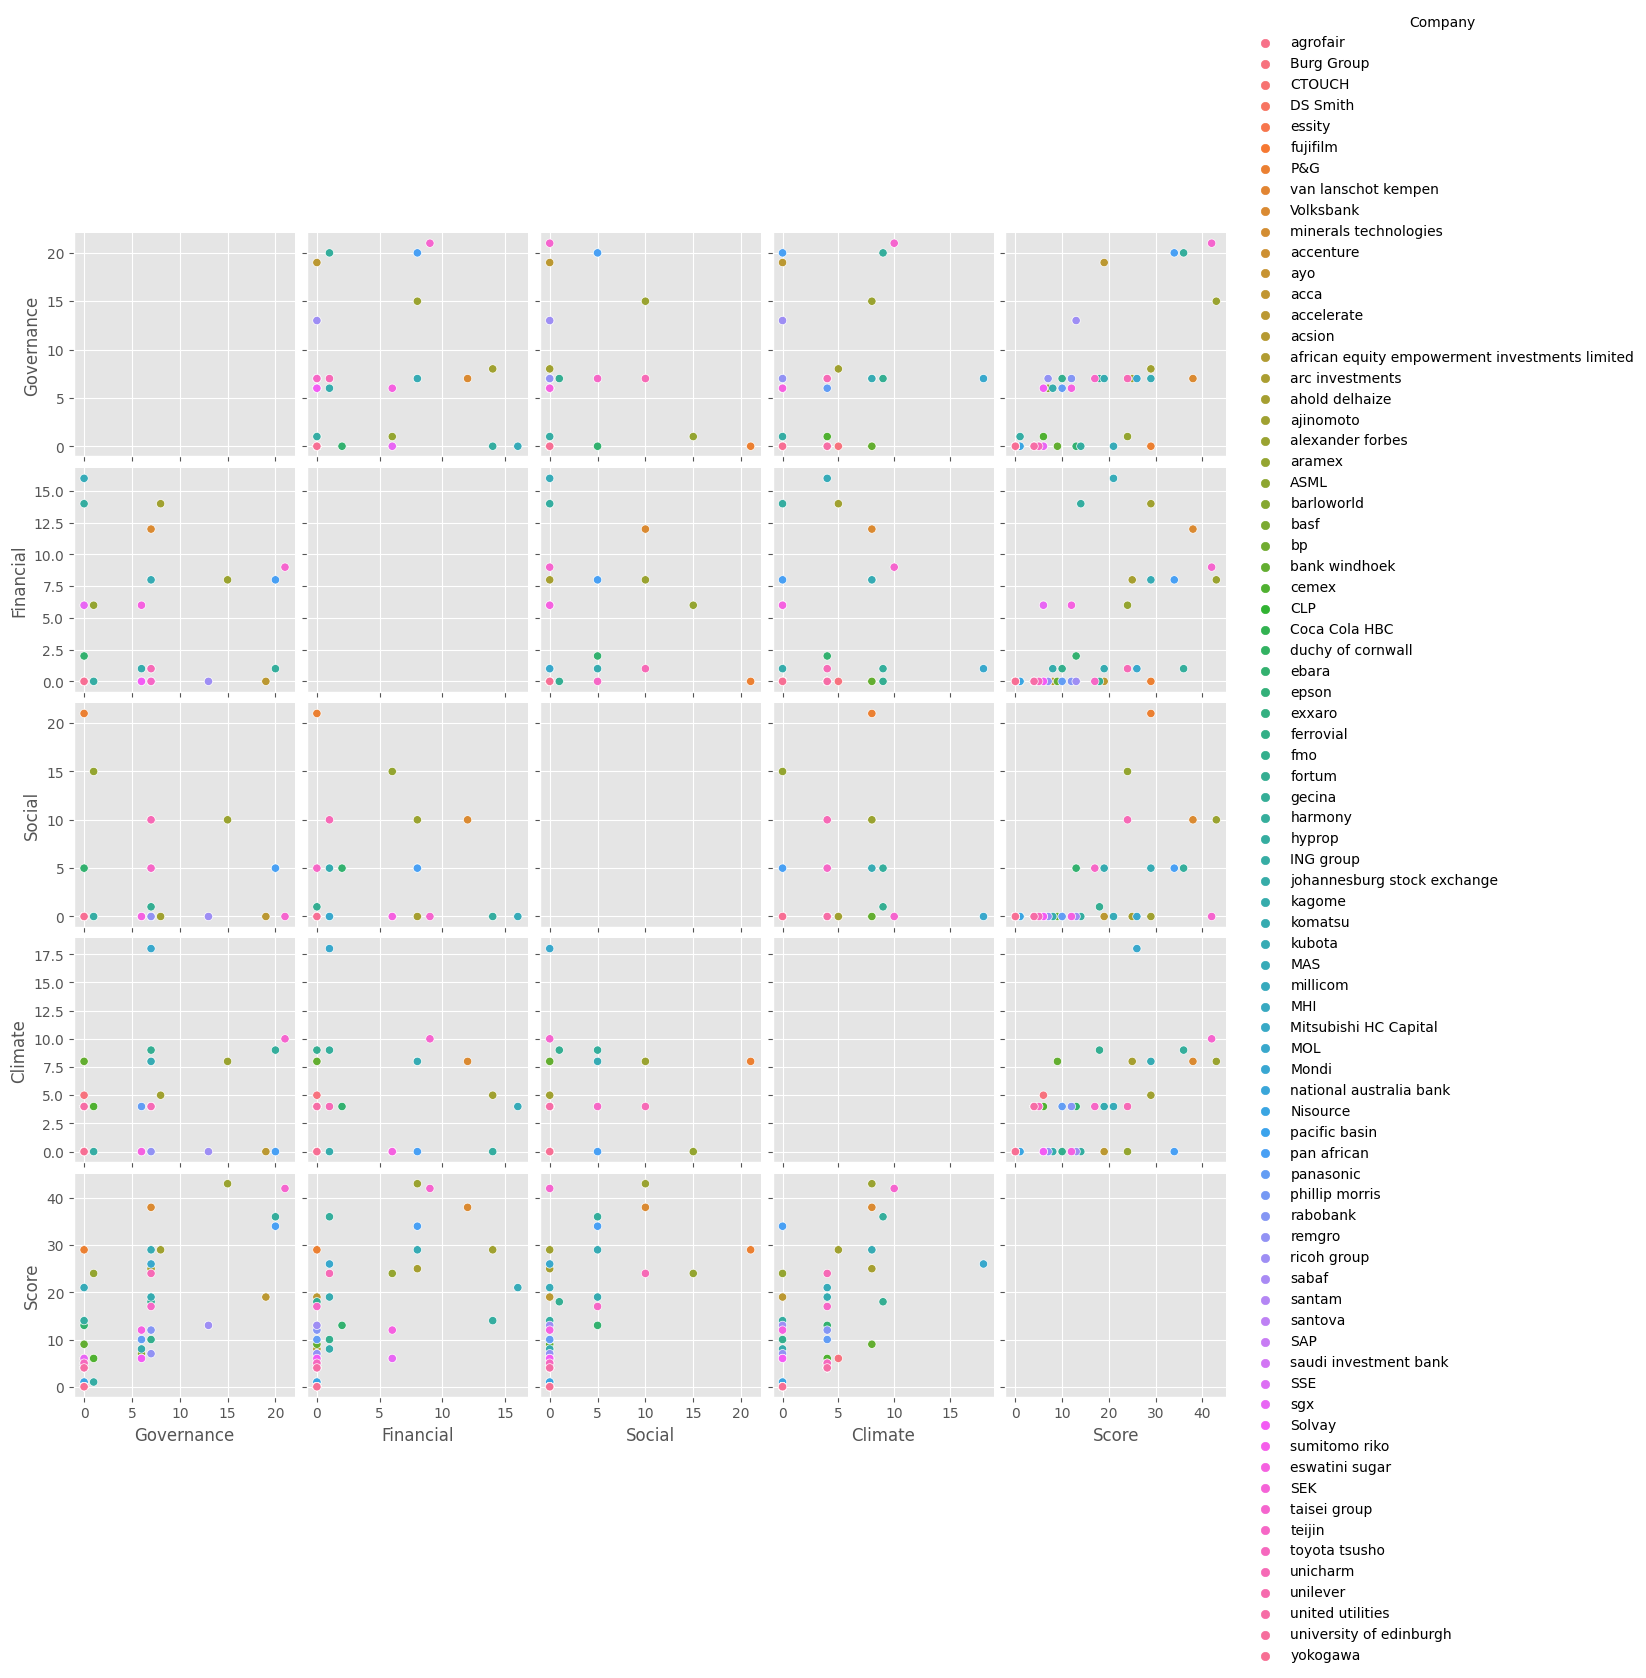

In [57]:
sns.pairplot(data=real_df, hue='Company')

<ipython-input-58-490afb5fca02>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = real_df.corr(method='pearson')


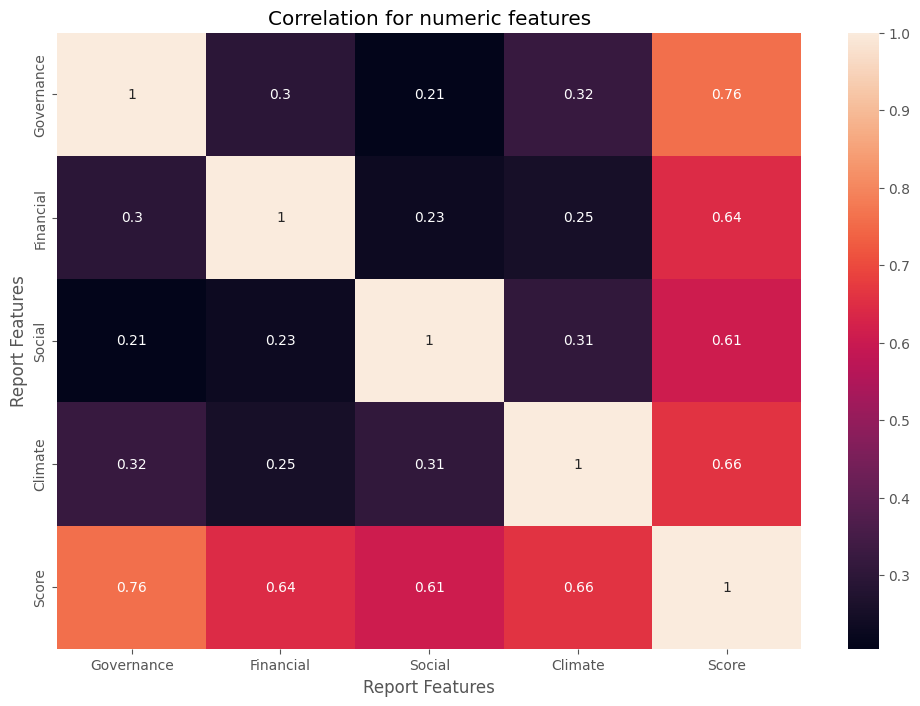

In [58]:
correlation_matrix = real_df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation for numeric features')
plt.xlabel('Report Features')
plt.ylabel('Report Features')

plt.show()

In [34]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [36]:
from matplotlib.pyplot import figure
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

<Axes: xlabel='Score', ylabel='Governance'>

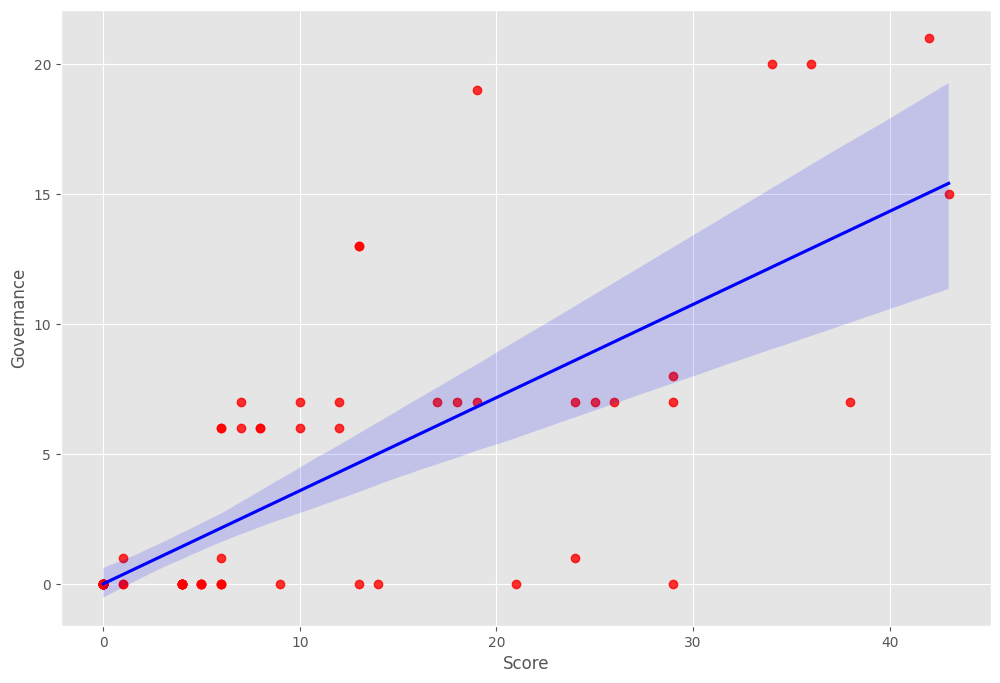

In [38]:
sns.regplot(x='Score',y='Governance',data=real_df, scatter_kws={"color":"red"},line_kws={"color":"blue"})

<Axes: xlabel='Score', ylabel='Climate'>

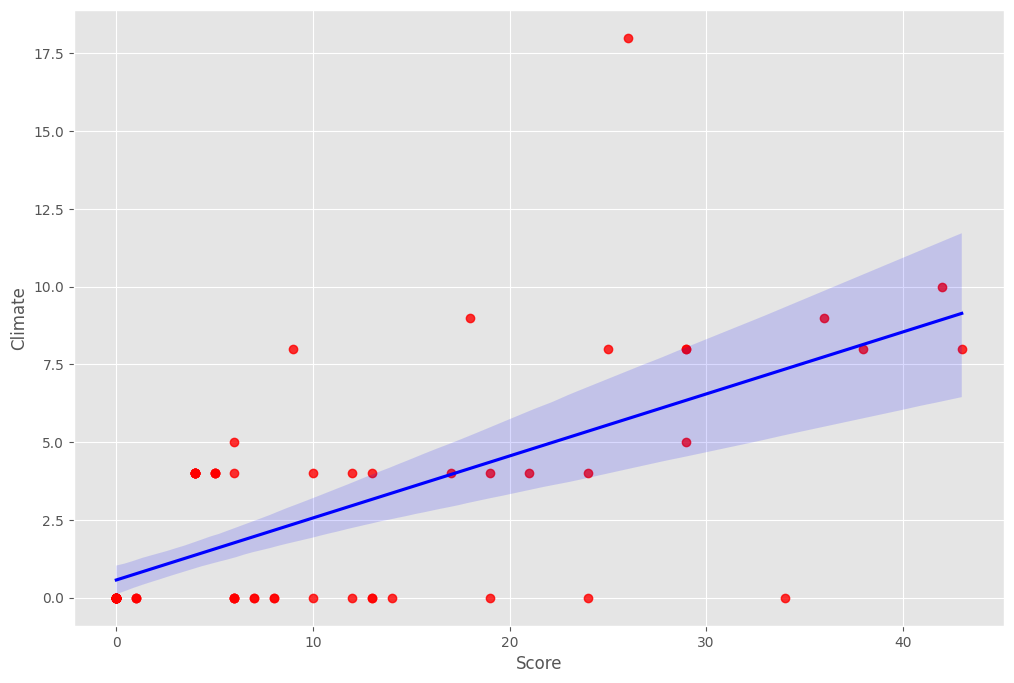

In [39]:
sns.regplot(x='Score',y='Climate',data=real_df, scatter_kws={"color":"red"},line_kws={"color":"blue"})

<Axes: xlabel='Score', ylabel='Social'>

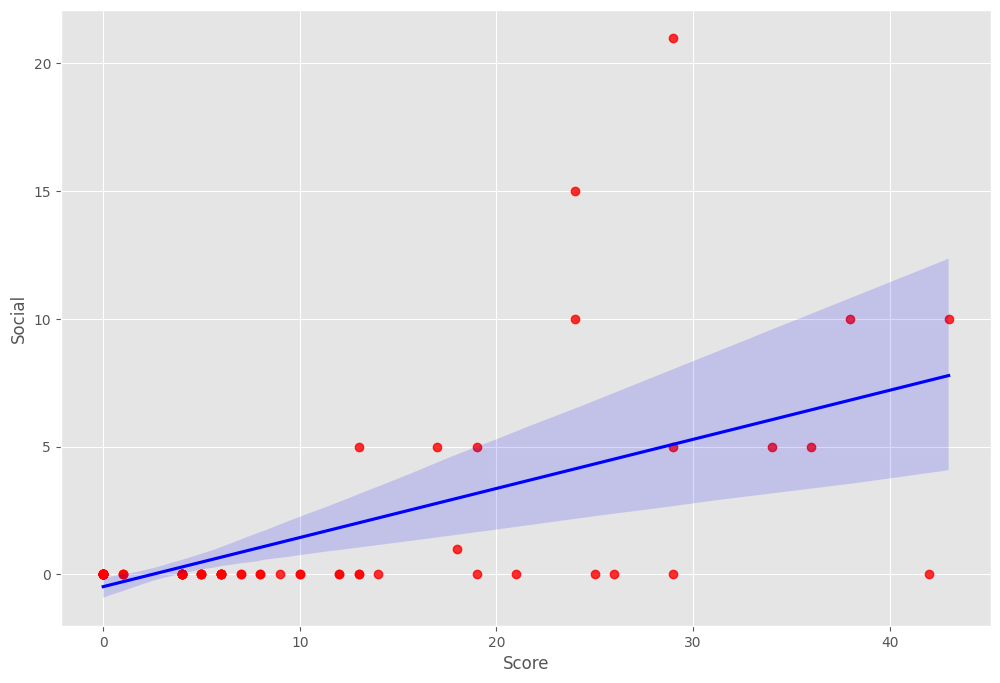

In [40]:
sns.regplot(x='Score',y='Social',data=real_df, scatter_kws={"color":"red"},line_kws={"color":"blue"})

<Axes: xlabel='Score', ylabel='Financial'>

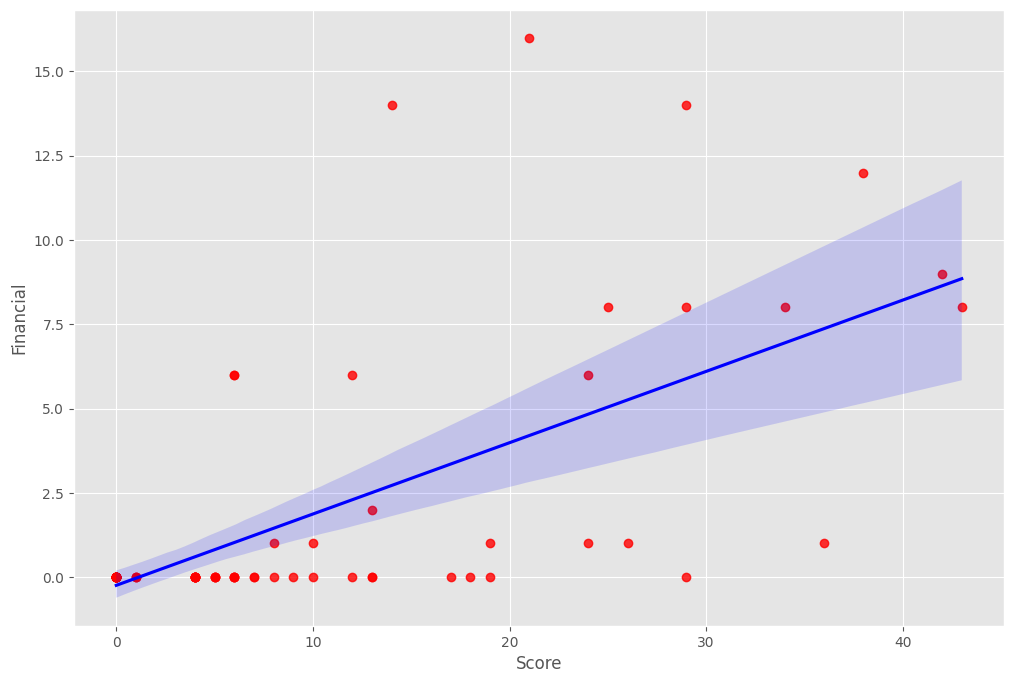

In [41]:
sns.regplot(x='Score',y='Financial',data=real_df, scatter_kws={"color":"red"},line_kws={"color":"blue"})